<a href="https://colab.research.google.com/github/GrmRy/Skripsi/blob/main/Curah_Hujan_Skripsi_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download Dataset

In [ ]:
!wget https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv

--2023-12-19 12:40:11--  https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17767 (17K) [text/plain]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>]  17.35K  --.-KB/s    in 0s      

2023-12-19 12:40:11 (34.7 MB/s) - ‘Dataset.csv’ saved [17767/17767]



## Import Libraries

In [ ]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell,Dropout

import warnings
warnings.filterwarnings('ignore')

## Data Processing

In [ ]:
df=pd.read_csv("Dataset.csv",parse_dates=["Tanggal"],index_col=[0])
df.head(10)

,Inflow (m/s),Outflow(m/s),Curah Hujan (mm)
Tanggal,,,
2021-01-01,106.15,0.00,1.6
2021-01-02,104.53,0.00,3.5
2021-01-03,29.17,0.00,0.0
2021-01-04,44.03,0.00,2.3
2021-01-05,48.07,4.32,8.0
2021-01-06,71.51,0.00,8888.0
2021-01-07,64.15,6.53,0.0
2021-01-08,67.52,8.92,1.0
2021-01-09,28.10,0.00,43.5


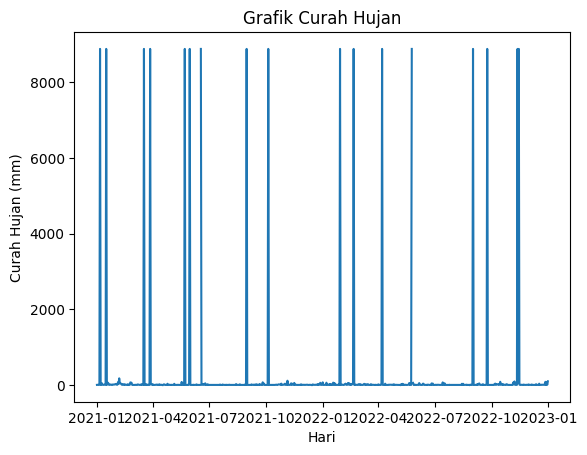

In [ ]:
plt.plot(df["Curah Hujan (mm)"])
plt.xlabel("Hari")
plt.ylabel("Curah Hujan (mm)")
plt.title("Grafik Curah Hujan")
plt.show()

In [ ]:
df=df.drop(["Outflow(m/s)","Inflow (m/s)"],axis=1)

In [ ]:
df.head()

,Curah Hujan (mm)
Tanggal,
2021-01-01,1.6
2021-01-02,3.5
2021-01-03,0.0
2021-01-04,2.3
2021-01-05,8.0


In [ ]:
df.loc[df['Curah Hujan (mm)'] == 8888, 'Curah Hujan (mm)'] = np.nan

In [ ]:
df.isnull().sum()

Curah Hujan (mm)    31
dtype: int64

In [ ]:
df.interpolate(method='linear',inplace=True)

In [ ]:
# Setelah dilakukan interpolasi
df.isnull().sum()

Curah Hujan (mm)    0
dtype: int64

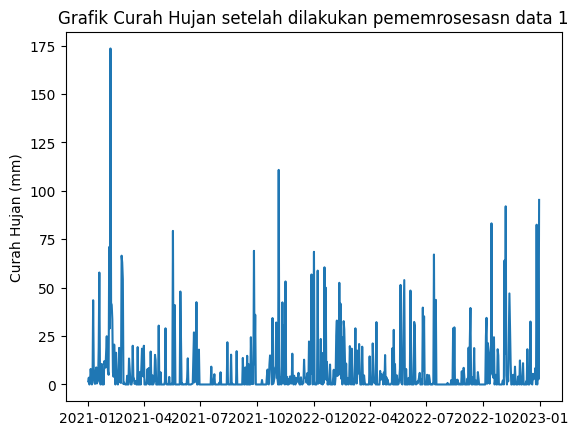

In [ ]:
plt.plot(df["Curah Hujan (mm)"])
plt.ylabel("Curah Hujan (mm)")
plt.title("Grafik Curah Hujan setelah dilakukan pememrosesasn data 1")
plt.show()

In [ ]:
df.loc[df['Curah Hujan (mm)'] > 70, 'Curah Hujan (mm)'] = np.nan
df['Curah Hujan (mm)'].fillna(70,inplace=True)

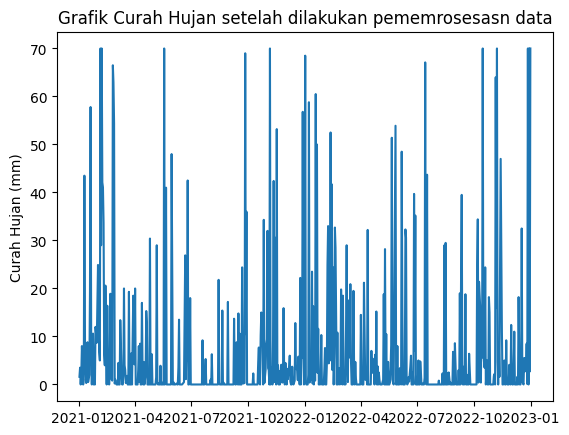

In [ ]:
plt.plot(df["Curah Hujan (mm)"])
plt.ylabel("Curah Hujan (mm)")
plt.title("Grafik Curah Hujan setelah dilakukan pememrosesasn data")
plt.show()

In [ ]:
n = len(df)


train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

train_df.shape, test_df.shape

((584, 1), (146, 1))

In [ ]:
# Sebelum dilakukan fit transform
print(train_df)

            Curah Hujan (mm)
Tanggal                     
2021-01-01               1.6
2021-01-02               3.5
2021-01-03               0.0
2021-01-04               2.3
2021-01-05               8.0
...                      ...
2022-08-03               0.0
2022-08-04               0.0
2022-08-05               0.8
2022-08-06               0.0
2022-08-07               0.0

[584 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


train_df = scaler.fit_transform(train_df)
test_df = scaler.fit_transform(test_df)

In [ ]:
# Setelah dilakukan fit transform
print(train_df)

[[0.02285714]
 [0.05      ]
 [0.        ]
 [0.03285714]
 [0.11428571]
 [0.05714286]
 [0.        ]
 [0.01428571]
 [0.62142857]
 [0.11      ]
 [0.04714286]
 [0.00428571]
 [0.09285714]
 [0.12571429]
 [0.00714286]
 [0.01785714]
 [0.02857143]
 [0.27428571]
 [0.82571429]
 [0.11142857]
 [0.        ]
 [0.14857143]
 [0.15142857]
 [0.        ]
 [0.07428571]
 [0.        ]
 [0.17142857]
 [0.14571429]
 [0.12428571]
 [0.24142857]
 [0.35571429]
 [0.18142857]
 [0.09571429]
 [0.07142857]
 [1.        ]
 [0.41428571]
 [1.        ]
 [0.60142857]
 [0.58714286]
 [0.48142857]
 [0.08857143]
 [0.05714286]
 [0.29428571]
 [0.14571429]
 [0.        ]
 [0.23428571]
 [0.07857143]
 [0.07428571]
 [0.        ]
 [0.06      ]
 [0.27      ]
 [0.02      ]
 [0.01428571]
 [0.01142857]
 [0.95      ]
 [0.89857143]
 [0.77714286]
 [0.00285714]
 [0.01428571]
 [0.00428571]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.06428571]
 [0.        ]
 [0.        ]
 [0.19142857]
 [0.12      ]
 [0.03285714]
 [0.        ]
 [0.        ]
 [0.02

In [ ]:
def createDataset(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
n_past=19
trainX,trainY=createDataset(train_df,n_past)

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (565, 19, 1)
trainY Shape--  (565,)


##Train Model

In [ ]:
model = Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2] )))
model.add(Dropout(0.2))
model.add(LSTM(128,activation='relu',return_sequences=True))
# model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 19, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 19, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 19, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=["mse"])

history=model.fit(trainX, trainY, epochs=1000, batch_size = 64, validation_split=0.1, verbose=1)
print("Hasil Training Model Curah Hujan")

Epoch 1/1000
8/8 [==============================] - 9s 271ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 2/1000
8/8 [==============================] - 1s 179ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 3/1000
8/8 [==============================] - 1s 134ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 4/1000
8/8 [==============================] - 1s 109ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 5/1000
8/8 [==============================] - 1s 107ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 6/1000
8/8 [==============================] - 1s 111ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 7/1000
8/8 [==============================] - 1s 109ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 8/1000
8/8 [==============================] - 1s 111ms/step - loss: 0.

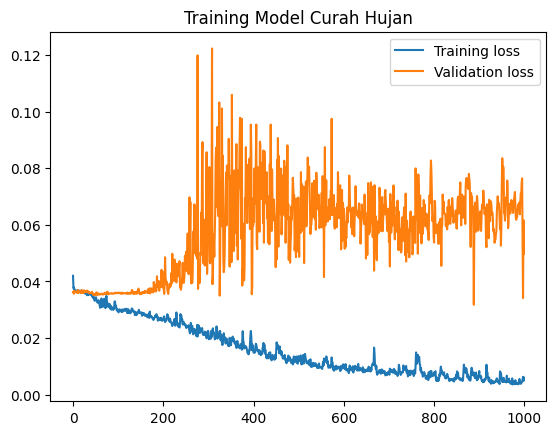

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training Model Curah Hujan')
plt.legend()

In [ ]:
testX,testY=createDataset(test_df,n_past)

In [ ]:
predictions = model.predict(testX)
print(predictions.shape)

4/4 [==============================] - 1s 24ms/step
(127, 1)


In [ ]:
pred=scaler.inverse_transform(predictions)

In [ ]:
original_copies_array = np.repeat(testY,3, axis=-1)

print (original_copies_array.shape)

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))[:,0]
print(original.shape)

(381,)
(127,)


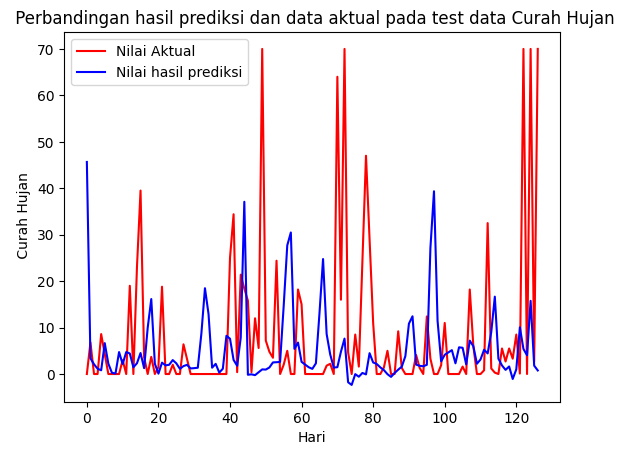

In [ ]:
plt.plot(original, color = 'red', label = 'Nilai Aktual')
plt.plot(pred, color = 'blue', label = 'Nilai hasil prediksi')
plt.title(' Perbandingan hasil prediksi dan data aktual pada test data Curah Hujan')
plt.xlabel('Hari')
plt.ylabel(' Curah Hujan')
plt.legend()
plt.show()

In [ ]:
# Hasil testing parameter curah hujan
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, predictions)

0.0698687182675619

##Forecast The future

In [ ]:
future_df = scaler.fit_transform(df)
predictX,predictY=createDataset(future_df,n_past)

In [ ]:
n_future = 365
prediction=model.predict(predictX[-n_future:])
prediction_copies = np.repeat(prediction, future_df.shape[1], axis=-1)
y_future = scaler.inverse_transform(prediction_copies)[:,0]

12/12 [==============================] - 0s 21ms/step


In [ ]:
df_past = df[['Curah Hujan (mm)']].reset_index()
df_past.rename(columns={'index': 'Date'}, inplace=True)
df_past['Tanggal'] = pd.to_datetime(df_past['Tanggal'])
df_past['Forecast'] = np.nan

df_future = pd.DataFrame(columns=['Tanggal', 'Curah Hujan (mm)', 'Forecast'])
df_future['Tanggal'] = pd.date_range(start=df_past['Tanggal'].iloc[-1] + pd.Timedelta(days=1), periods=n_future)
df_future['Forecast'] = y_future.flatten()
df_future['Curah Hujan (mm)'] = np.nan

<Axes: title={'center': 'Curah hujan waduk kedungombo'}, xlabel='Tanggal'>

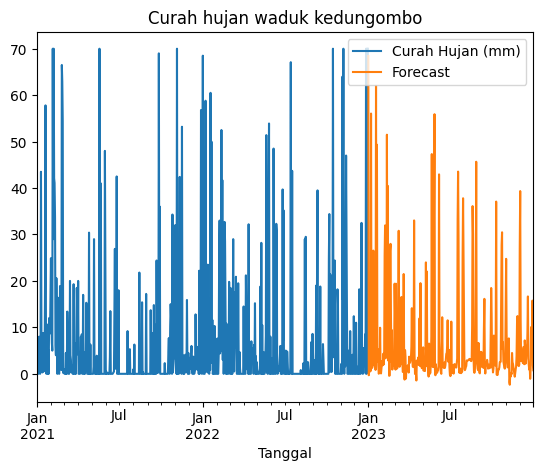

In [ ]:
results = df_past.append(df_future).set_index('Tanggal')
results.plot(title='Curah hujan waduk kedungombo')

In [ ]:
df_future=df_future.drop(['Curah Hujan (mm)'],axis=1)
df_future.to_excel('Hasil prediksi Hujan.xlsx',index=True)